In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind

import numpy as np


olympic_load = Path("olympic_merged.csv")

# Read School and Student Data File and store into Pandas DataFrames
olympic_merged = pd.read_csv(olympic_load )




Unnamed: 0         0
ID                 0
Name               0
Sex                0
Age             9474
Height         60171
Weight         62875
Team               0
Games              0
Year               0
Season             0
City               0
Sport              0
Medal         231333
region           370
dtype: int64

In [33]:
olympic_merged_ap=olympic_merged.fillna("NA")
olympic_merged_ap=olympic_merged.loc[olympic_merged["Medal"]!="NA",:]
olympic_merged_ap=olympic_merged.loc[olympic_merged["Age"]!="NA",:]

olympic_merged_m=olympic_merged.loc[olympic_merged["Sex"]!="M",:]
olympic_merged_m_list=olympic_merged_m[["Age","ID"]].copy()
olympic_m_age=olympic_merged_m_list.values.tolist()


In [34]:
olympic_merged_f=olympic_merged.loc[olympic_merged["Sex"]!="F",:]
olympic_merged_f_list=olympic_merged_f[["Age","ID"]].copy()
olympic_f_age=olympic_merged_f_list.values.tolist()

In [10]:
ttest_ind(olympic_m_age, olympic_f_age, equal_var=False)

Ttest_indResult(statistic=array([-32.26954353,   6.06901576]), pvalue=array([1.28265475e-223, 1.30945834e-009]))

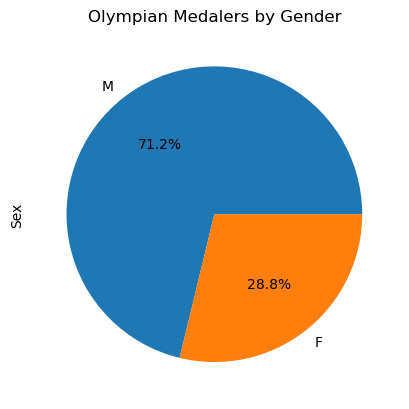

<Figure size 640x480 with 0 Axes>

In [21]:
gender_chart=olympic_merged_ap["Sex"].value_counts()
plt.title("Olympian Medalers by Gender")
gender_chart.plot.pie(autopct= "%1.1f%%")
plt.show()
plt.savefig("Output/pie.jpg")

In [23]:
age_bin=[15,24,30,40,80]
labels = ["15-24", "25-30", "31-40", "41-80"]
olympic_merged_ap2=olympic_merged_ap.copy()
olympic_merged_ap2["Age by Decade"]=pd.cut(olympic_merged_ap["Age"],age_bin,labels=labels,include_lowest=True)
olympic_merged_f=olympic_merged_ap.loc[olympic_merged_ap["Sex"]!="F",:]
olympic_merged_m=olympic_merged_ap.loc[olympic_merged_ap["Sex"]!="M",:]

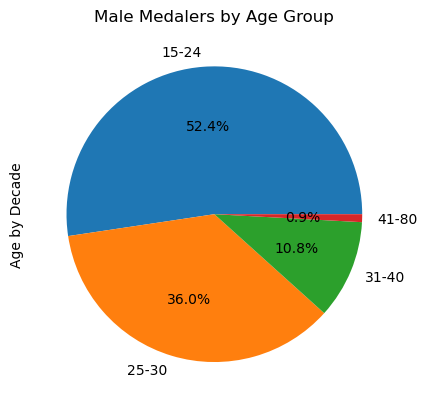

In [30]:
age_m_chart=olympic_merged_m["Age by Decade"].value_counts()
plt.title("Male Medalers by Age Group")
age_m_chart.plot.pie(autopct= "%1.1f%%")
plt.show()


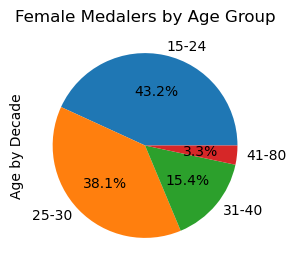

<Figure size 640x480 with 0 Axes>

In [32]:
age_f_chart=olympic_merged_f["Age by Decade"].value_counts()
plt.title("Female Medalers by Age Group")
age_f_chart.plot.pie(autopct= "%1.1f%%",figsize=(3,3))
plt.show()
plt.savefig("f_plot.png")

In [ ]:
age_f_chart.plot.bar(x="Medal",y="Age")
plt.show()